## Canada - Product Vs Price Trend and Analysis

In [484]:
# !pip install pandas

Data Sources
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810024502

Inflation Rate
https://www.rateinflation.com/inflation-rate/canada-historical-inflation-rate/

In [485]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Chart Theme Color
green : #1a7257  #00b79b
light green : #bfdfbe #bab0ab
lightyellow : #eedcd7
orange : #f65725  #fa7d00

background = #fe9a02


In [507]:
# Product Price Data set
file = pd.read_csv('./sales_data.csv')

In [487]:
df = pd.DataFrame(file)

In [488]:
url = 'https://www.rateinflation.com/inflation-rate/canada-historical-inflation-rate'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')


In [489]:
# Extract table rows from the table
rows = table.find_all('tr')

In [490]:
# Extract table header
# Extract headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Prepare data
inflation = []
for row in rows[1:]:
    cells = row.find_all('td')
    inflation.append([cell.text.strip() for cell in cells])

record = pd.DataFrame(inflation, columns=headers)

# Rename the Column Name
record = record.rename(columns={
    'jan':'01',
    'feb':'02',
    'mar':'03',
    'apr':'04',
    'may':'05',
    'jun':'06',
    'jul':'07',
    'aug':'08',
    'sep':'09',
    'oct':'10',
    'nov':'11',
    'dec':'12',
    })

In [491]:
record.dtypes

Year      object
01        object
02        object
03        object
04        object
05        object
06        object
07        object
08        object
09        object
10        object
11        object
12        object
Annual    object
dtype: object

In [492]:
record =  record[record['Year'] >'2017']


In [493]:
# covert the data type to float
record = record.replace("%","",regex=True)
record.fillna(0)
record.dtypes
# Convert to float
record[['01','02','03','04','05','06','07','08','09','10','11']] = record[['01','02','03','04','05','06','07','08','09','10','11']].astype(float)

In [494]:
df.head(2)

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,12.66,NaN,NaN,NaN,2
1,2017-01,Canada,2016A000011124,"Beef striploin cuts, per kilogram",Dollars,81,units,0,v1353834272,11.2,21.94,NaN,NaN,NaN,2


In [495]:
df.drop(columns=['DGUID','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','TERMINATED','DECIMALS','SYMBOL'],inplace=True)


In [496]:
# Extracting the Year and Month from the DATE column
df['Year'] = df['REF_DATE'].str.split("-").str[0]
df['Month'] = df['REF_DATE'].str.split("-").str[1]

In [497]:
# Extracting Only Product name from the Products Column rather that weight and litre
df['Product'] = df['Products'].str.split(",").str[0]

In [498]:
# Add three new columns for GEO (Latitude and Longitude) of each provinces
# Add Inflation rate for each Year from 2017 - 2024

# Inflation Rate
inflation_rate = {
    "2017": 1.6,
    "2018": 2.27,
    "2019": 1.95,
    "2020": 0.72,
    "2021": 3.4,
    "2022": 6.8,
    "2023": 3.88,
    "2024": 2.44
}

# GEO Coordinate
province_coordinates = {
    "Alberta": "53.9333, -116.5765",
    "British Columbia": "53.7267, -127.6476",
    "Manitoba": "53.7609, -98.8139",
    "New Brunswick": "46.5653, -66.4619",
    "Newfoundland and Labrador": "53.1355, -57.6604",
    "Nova Scotia": "44.6820, -63.7443",
    "Ontario": "51.2538, -85.3232",
    "Prince Edward Island": "46.5107, -63.4168",
    "Quebec": "52.9399, -73.5491",
    "Saskatchewan": "52.9399, -106.4509",
    "Northwest Territories": "64.8255, -124.8457",
    "Nunavut": "70.2998, -83.1076",
    "Yukon": "64.2823, -135.0000"
}


In [499]:
# Renaming the column with proper format and case
df = df.rename(columns={'REF_DATE':'Date','GEO':'Province','VALUE':'Price'})
# Assign canada as country column
df['Country'] = 'Canada'
# Dropping the Original Products Columns since we have a new column for the product names
df = df.drop(columns=['Products'])

In [500]:
df.dtypes

Date         object
Province     object
Price       float64
Year         object
Month        object
Product      object
Country      object
dtype: object

In [501]:
# Mapping GEO Coordinate and Yearly Inflation Rate
df['Coordinate'] = df['Province'].map(province_coordinates)
df['Lat'] = df['Coordinate'].str.split(",").str[0]
df['Long'] = df['Coordinate'].str.split(",").str[1]
df['Yearly Inflation'] = df['Year'].map(inflation_rate)
# Drop the Coordinate Column
df.drop(columns=['Coordinate'],inplace=True)

In [502]:
# Dropping all the rows with Provinces== Canada because
# We are analyzing the price vs product trend of all the provinces in Canada
df_clean =  df[
    (df['Province'] !='Canada')&
    (df['Year'] >"2017")
    ]

In [503]:
# Change the Data type of the Coordinate to Float
df_clean['Lat'] = df_clean['Lat'].astype(float)
df_clean['Long'] = df_clean['Long'].astype(float)

/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_4856/1655401125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lat'] = df_clean['Lat'].astype(float)
/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_4856/1655401125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Long'] = df_clean['Long'].astype(float)


In [504]:

# Mapping the Monthly Inflation

# Reshape df1 into a long format
monthly_inflation = record.melt(id_vars='Year', var_name='Month', value_name='Monthly Inflation')
# Merge df1_long with df2 on Year and Month
df_clean = pd.merge(df_clean, monthly_inflation, on=['Year', 'Month'], how='left')


# df_clean = df_clean[['Date','Year','Month','Country','Province','Product','Price','Inflation','Lat','Long']]
# Column Rearrange
arrange_column = ['Date','Year','Month','Country','Province','Product','Price','Yearly Inflation','Monthly Inflation','Lat','Long']
df_clean = df_clean[arrange_column]

In [505]:
#  Export CSV Files

df_clean.to_csv('Clean_data.csv')

In [506]:
df_clean

,Date,Year,Month,Country,Province,Product,Price,Yearly Inflation,Monthly Inflation,Lat,Long
0,2018-01,2018,01,Canada,Newfoundland and Labrador,Beef stewing cuts,13.40,2.27,1.7,53.1355,-57.6604
1,2018-01,2018,01,Canada,Newfoundland and Labrador,Beef striploin cuts,16.29,2.27,1.7,53.1355,-57.6604
2,2018-01,2018,01,Canada,Newfoundland and Labrador,Beef top sirloin cuts,17.14,2.27,1.7,53.1355,-57.6604
3,2018-01,2018,01,Canada,Newfoundland and Labrador,Beef rib cuts,25.80,2.27,1.7,53.1355,-57.6604
4,2018-01,2018,01,Canada,Newfoundland and Labrador,Ground beef,7.28,2.27,1.7,53.1355,-57.6604
...,...,...,...,...,...,...,...,...,...,...,...
90113,2024-10,2024,10,Canada,British Columbia,Sunflower seeds,4.51,2.44,2.0,53.7267,-127.6476
90114,2024-10,2024,10,Canada,British Columbia,Deodorant,7.93,2.44,2.0,53.7267,-127.6476
90115,2024-10,2024,10,Canada,British Columbia,Toothpaste,4.03,2.44,2.0,53.7267,-127.6476
90116,2024-10,2024,10,Canada,British Columbia,Shampoo,7.27,2.44,2.0,53.7267,-127.6476


green : #1a7257 
light green : #bfdfbe
lightyellow : #eedcd7
orange : #f65725




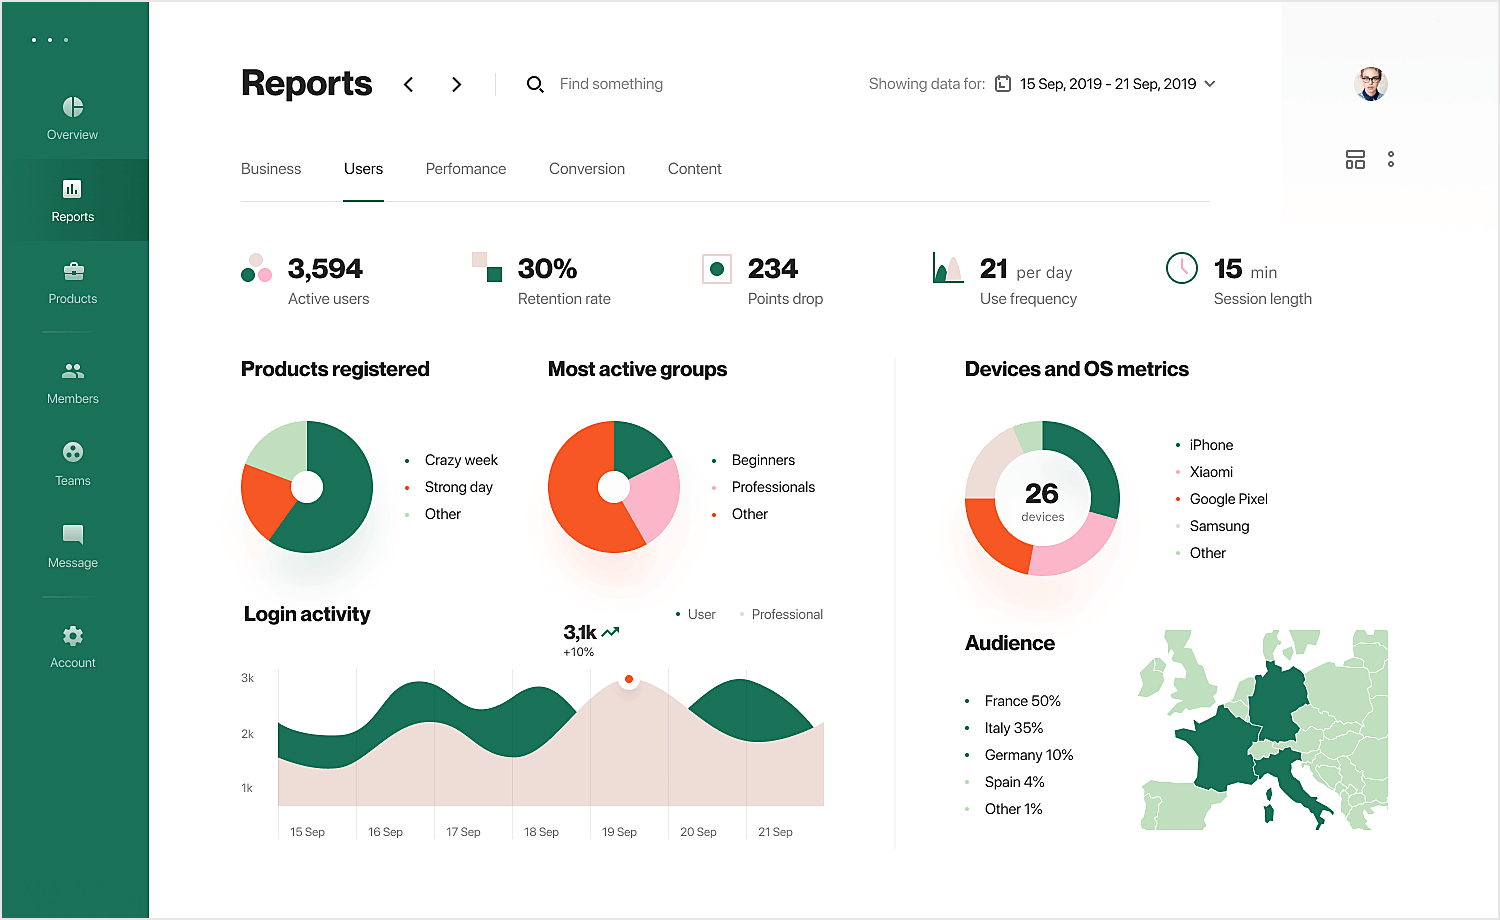

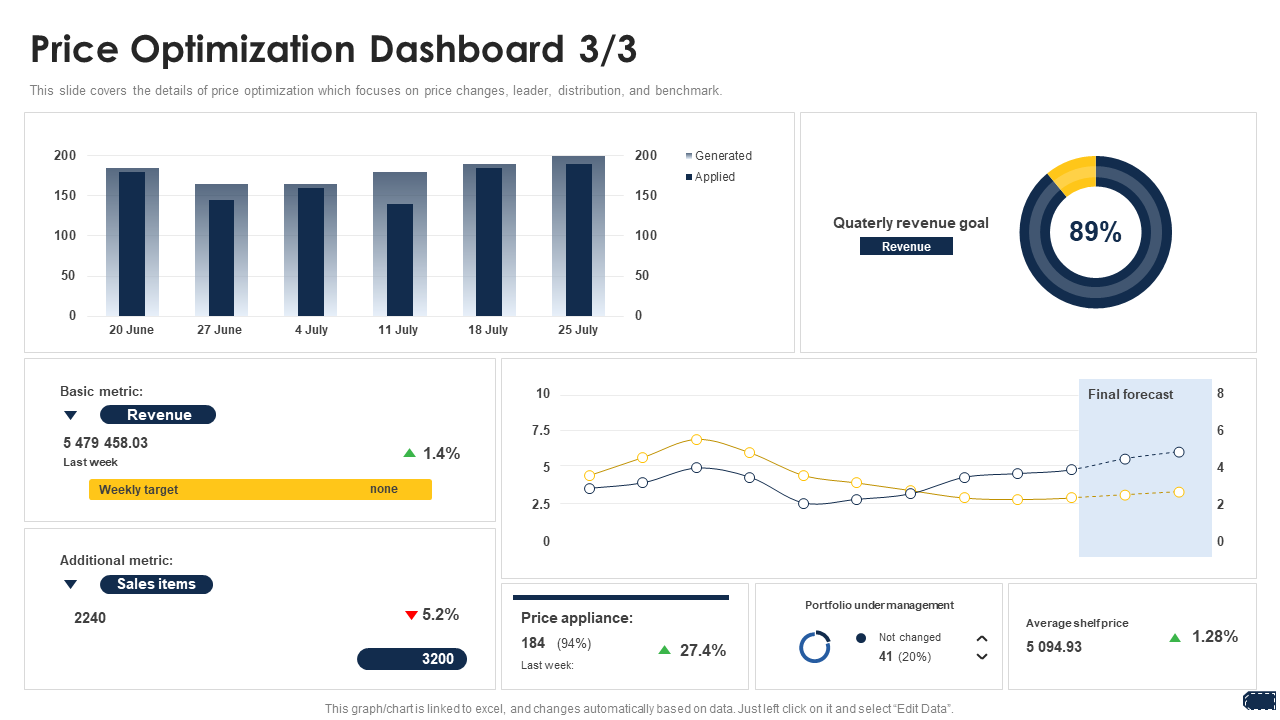